In [1]:
from pprint import pprint

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import pytop as pt

In [7]:
batch_size = 20
nodes_size_interval = (8, 15)
m_size_interval = (2, 2)
name = "H&S"
#batch_generator = pb.graph_batch_generator(batch_size, nodes_size_interval, m_size_interval)
batch_generator = pt.batch_files_generator("dataset/test_zoo_non_generalization/"+ name, 1)

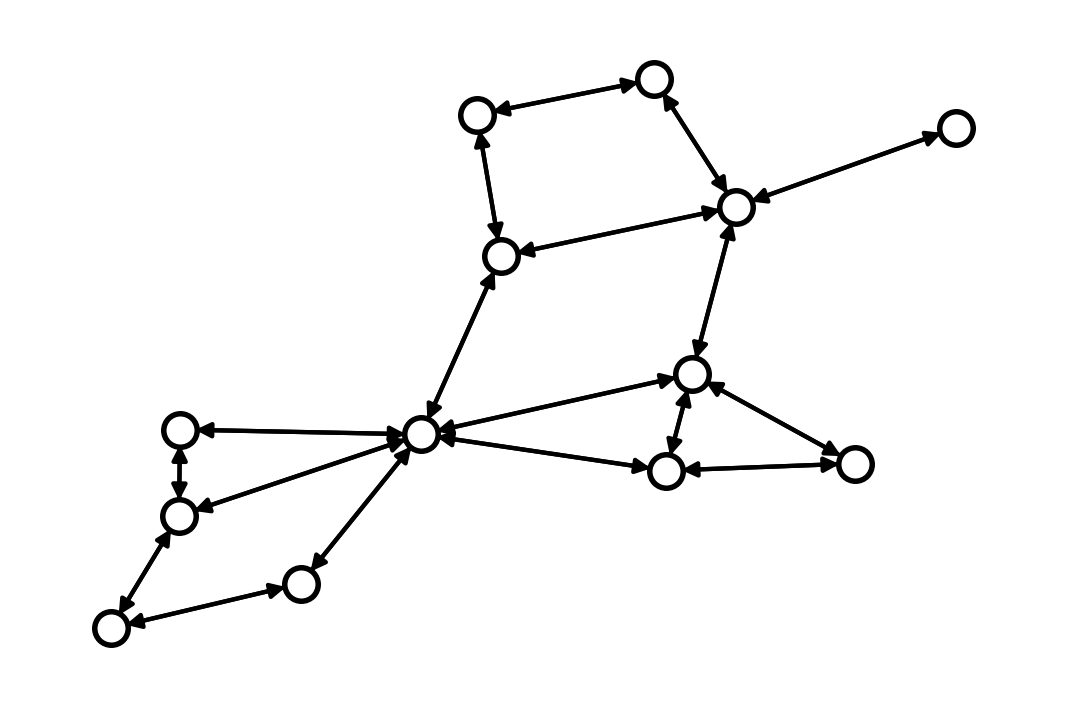

In [48]:
i = 0
for in_batch, tg_batch, p in batch_generator:
    for in_graph, tg_graph in zip(in_batch, tg_batch):
        pos = in_graph.nodes(data="pos")
        #pos = nx.spring_layout(in_graph)
        target_node = tg_graph.graph['features']

        f, ax1 = plt.subplots(1, 1, sharey=True, dpi=220)
        ax1.set_axis_off()
        nx.draw_networkx_edges(
            tg_graph,
            ax=ax1,
            pos=pos,
            linewidths=1.8,
            width=1.4,
            node_size=100
        )
        nx.draw_networkx_nodes(
            tg_graph,
            ax=ax1,
            pos=pos,
            node_size=120,
            linewidths=1.8,
            node_color="w",
            edgecolors="k"
        )
        plt.savefig(name + "_sample" + str(i) + ".pdf", transparent=True)
        plt.show()
        plt.close()
    if i == 0:
        break
    i += 1

In [49]:
edges = tg_graph.edges()
tg_graph.remove_edges_from(list(edges))

In [50]:
nodes = dict(tg_graph.nodes(data="pos"))
nodes = [(n, dict(pos=p)) for n, p in nodes.items()]

In [51]:
model_graph = nx.Graph()
model_graph.add_nodes_from(nodes)

In [52]:
nx.write_gpickle(model_graph, "model_graph")

In [ ]:
for in_batch, tg_batch, pos in batch_generator:
    p = 0
    for in_graph, tg_graph in zip(in_batch, tg_batch):
        edge_solution = np.array([not f[2] for f in tg_graph.edges(data="solution")], np.bool)
        p += edge_solution[edge_solution].size / edge_solution.size
    print(p/batch_size)
    break

In [ ]:
for in_batch, tg_batch, p in batch_generator:
    for in_graph, tg_graph in zip(in_batch, tg_batch):
        for s, r, d in in_graph.edges(data="distance"):
            if d == 0 and ( s == in_graph.number_of_nodes() or r == in_graph.number_of_nodes() ):
                print(s, r, d)
                print(G.nodes(data="pos"))
                np.a

        print()
        #pos = np.array(list(dict(tg_graph.nodes(data="pos")).values()))
        pos = nx.spring_layout(in_graph)
        target_node = tg_graph.graph['features']

        edge_solution = [f[2] for f in tg_graph.edges(data="features")]
        edges_to_plot = []
        for e, s in zip(tg_graph.edges(), edge_solution):
            if np.argmax(s, axis=-1) == 1:
                edges_to_plot.append(e)

        edge_solution_ = [f[2] for f in tg_graph.edges(data="solution")]
        edges_to_plot_ = []
        for e, s in zip(tg_graph.edges(), edge_solution_):
            if s:
                edges_to_plot_.append(e)

        nodes_color = []
        for ip in dict(tg_graph.nodes(data="ip")).values():
            if np.all(ip == target_node):
                nodes_color.append("red")
            else:
                nodes_color.append("#1f78b4")

        f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, dpi=180)
        ax1.set_axis_off()
        ax2.set_axis_off()
        nx.draw_networkx_edges(
            tg_graph,
            ax=ax1,
            pos=pos,
            width=1.4,
            node_size=140
        )
        nx.draw_networkx_nodes(
            tg_graph,
            ax=ax1,
            pos=pos,
            node_color=nodes_color,
            node_size=120,
            edgecolors="k"
        )
        nx.draw_networkx_edges(
            tg_graph,
            ax=ax2,
            pos=pos,
            edgelist=edges_to_plot,
            edge_color=["green"] * len(edges_to_plot),
            width=1.4,
            node_size=120
        )
        nx.draw_networkx_nodes(
            tg_graph,
            ax=ax2,
            pos=pos,
            node_color=nodes_color,
            node_size=120,
            edgecolors="k"
        )
        plt.show()
        plt.close()

        print("Features from Input")
        print("For Nodes:")
        pprint(dict(in_graph.nodes(data="features")))
        print("For Edges:")
        pprint([((f[0], f[1]), f[2]) for f in in_graph.edges(data="features")])

        print("\nFeatures from Target")
        print("For Nodes:")
        pprint(dict(tg_graph.nodes(data="features")))
        print("For Edges:")
        pprint([((f[0], f[1]), f[2]) for f in tg_graph.edges(data="features")])
    break

In [ ]:
pb.create_static_dataset("testdataset/", 20, (8,10))